In [139]:
#ml---Supervised,unsupervised,Rienforncementlearning.

In [140]:
#unsupervised learning-we dont know the target 

In [141]:
#k-means-clustering--find the cluster in data and do prediction.Here we try to find the structure of the data.

In [142]:
#Procedure:
#1.start with K centroids by putting them at random place.ex:(k=2)
#2.Compute distance of every point from centroid and cluster them accordingly.
#3.Adjust centroids so that they become center of gravity for given cluster.
#4.Again re-cluster every point based on their distance with centroid.
#5.Again adjust centroids.
#6.Recompute clusters and repeat this till data points stop changing clusters.

In [143]:
#HOW TO DETERMINE CORRECT NUMBER OF CLUSTERS(K):--ELBOW METHOD
#by finding SSE(Sum of Squared errors)for each clusters.
#SSE1=sum(dist(xi-c1))^2---------------c1=centroid1,----xi=points of the cluster 1.
#SSE2
#SSE=SSE1+SSE2+SSE3

#draw plot K vs SSE--------select the elbow point.

In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [145]:
df=pd.read_csv(r'E:\py\py-master\ML\13_kmeans\income.csv')

In [146]:
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


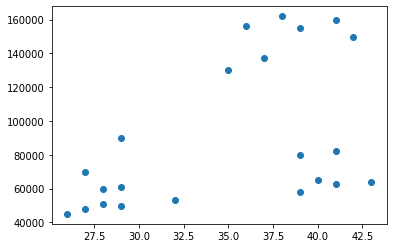

In [147]:
plt.scatter(df['Age'],df['Income($)'])

In [148]:
from sklearn.cluster import KMeans

In [149]:
km=KMeans(n_clusters=3)

In [150]:
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [151]:
y_predicted=km.fit_predict(df[['Age','Income($)']])

In [152]:
y_predicted

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2])

In [153]:
# it created 3 clusters.

In [154]:
df['cluster']=y_predicted

In [155]:
df

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1
5,Gautam,39,155000,1
6,David,41,160000,1
7,Andrea,38,162000,1
8,Brad,36,156000,1
9,Angelina,35,130000,1


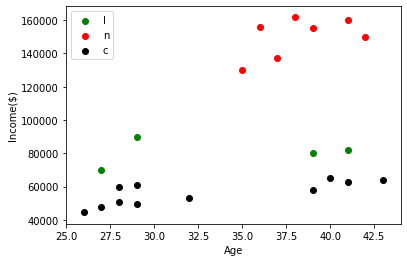

In [156]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]


plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend('Income($)')


In [157]:
#not correctly scattered.Because scalling is not proper.There is large difference between x and y.

In [158]:
from sklearn.preprocessing import MinMaxScaler

In [159]:
scaler=MinMaxScaler()

In [160]:
scaler.fit(df[['Income($)']])
df['Income($)']=scaler.transform(df[['Income($)']])

In [161]:
df.head()

,Name,Age,Income($),cluster
0,Rob,27,0.213675,0
1,Michael,29,0.384615,0
2,Mohan,29,0.136752,2
3,Ismail,28,0.128205,2
4,Kory,42,0.897436,1


In [162]:
scaler.fit(df[['Age']])
df['Age']=scaler.transform(df[['Age']])

In [163]:
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1


In [164]:
#So again we are fitting data

In [165]:
km=KMeans(n_clusters=3)
y_predicted=km.fit_predict(df[['Age','Income($)']])

In [166]:
y_predicted

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2])

In [167]:
df['cluster']=y_predicted

In [168]:
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [169]:
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

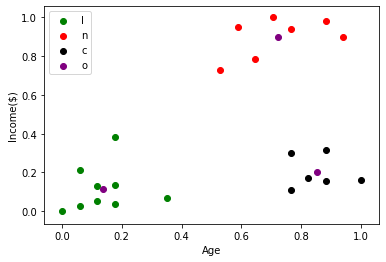

In [170]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]


plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',label='centroid')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend('Income($)')


In [171]:




#ELBOW PLOT

In [172]:
k_rng=range(1,10)
sse=[]
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)
    #km.inertia_---calculate the SSE.

In [173]:
sse

[5.43401151198818,
 2.091136388699078,
 0.4750783498553096,
 0.3491047094419565,
 0.2664030124668416,
 0.2157860776587302,
 0.16858512236029757,
 0.1327661931978319,
 0.10188787724979426]

Text(0, 0.5, 'sse')

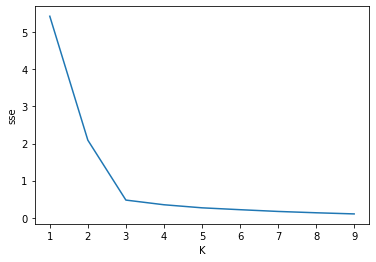

In [174]:
plt.plot(k_rng,sse)
plt.xlabel('K')
plt.ylabel('sse')

In [175]:
#So 3 is best point. for K

In [176]:
from sklearn.datasets import load_iris

In [177]:
iris=load_iris()

In [178]:
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [179]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)

In [180]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [181]:
df['target']=iris.target

In [182]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [183]:
from sklearn.cluster import KMeans

In [184]:
km=KMeans(n_clusters=3)

In [185]:
df=df.drop(['sepal length (cm)','sepal width (cm)','target'],axis='columns')

In [186]:
df.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [187]:
mod=km.fit_predict(df)

In [188]:
df['cluster']=mod

In [189]:
df.head()

,petal length (cm),petal width (cm),cluster
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1


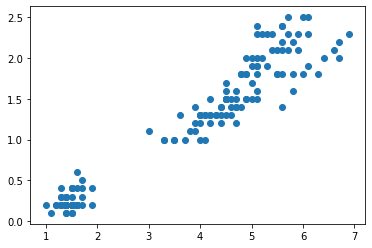

In [190]:
plt.scatter(df['petal length (cm)'],df['petal width (cm)'])

In [191]:
km.cluster_centers_

array([[4.26923077, 1.34230769],
       [1.462     , 0.246     ],
       [5.59583333, 2.0375    ]])

In [192]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]

In [193]:
df.head(2)

,petal length (cm),petal width (cm),cluster
0,1.4,0.2,1
1,1.4,0.2,1


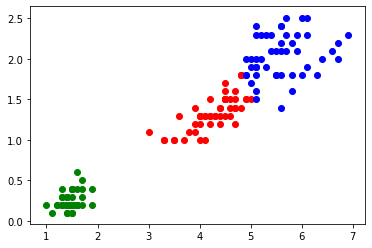

In [194]:
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='red')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='green')
plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'],color='blue')

In [195]:
#elbow plot

In [197]:
k_rg=range(1,10)
sse=[]
for k in k_rg:
    km=KMeans(n_clusters=k)
    km.fit(df)
    sse.append(km.inertia_)

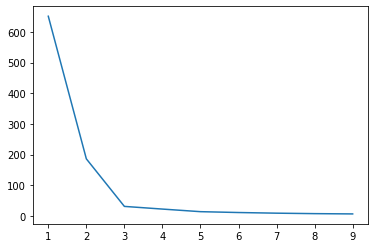

In [199]:
plt.plot(k_rg,sse)